In [1]:
#########################
##                     ##
## Irving Gomez Mendez ##
##     May 04, 2021    ##
##                     ##
#########################

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm

In [2]:
# Data from Hosmer, D.W. & Lemeshow, S. (1989) Applied logistic regression. Wiley
# Data are ages (in years) and indicator of significant damage in the coronary of 100 people
dat = pd.read_csv('Heart_Disease_vs_Age.csv')
n = dat.shape[0]
X = np.vstack([np.ones(n), dat['age']]).T
y = dat['chd']
alpha = 0.05

Text(0, 0.5, 'Prob. of Coronary Heart Disease')

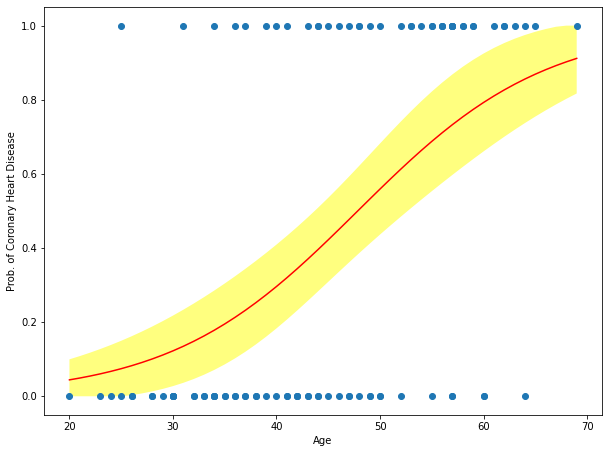

In [4]:
# Logistic regression by hand
b = [0,0] # initial values

tolm   = 1e-6       # tolerance (minimum norm of the difference of the betas)
iterm  = 100        # maximum number of iterations
tolera = 1          # initialize tolera
itera  = 0          # initialize ittera
histo  = b          # initialize beta upgrade

while((tolera > tolm) and (itera < iterm)):
  p      = 1/(1+np.exp(-X @ b))
  W      = np.diag(p*(1-p))
  delta  = np.linalg.solve(X.T @ W @ X, X.T @ (y-p))
  b      = b+delta
  tolera = np.sqrt(sum(delta**2))
  histo  = np.vstack([histo, b])
  itera  = itera+1

n0 = 50
x0 = np.linspace(dat['age'].min(), dat['age'].max(), n0)
X0 = np.vstack([np.ones(n0), x0]).T
p0 = 1/(1+np.exp(-X0 @ b))

aux_conf = np.sqrt(np.diag(X0 @ np.linalg.solve(X.T @ W @ X, X0.T)) * (p0*(1-p0))**2)

upp_conf = np.minimum(p0 + norm.ppf(1-alpha/2)*aux_conf, 1)
low_conf = np.maximum(p0 - norm.ppf(1-alpha/2)*aux_conf, 0)

plt.figure(figsize=(10,7.5))
plt.fill_between(x0, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label='Confidence interval')
plt.plot(dat['age'], dat['chd'], 'o')
plt.plot(x0, p0, 'r'),
plt.xlabel('Age')
plt.ylabel('Prob. of Coronary Heart Disease')

In [5]:
histo

array([[ 0.        ,  0.        ],
       [-4.13935119,  0.0870007 ],
       [-5.15456916,  0.10781291],
       [-5.27679322,  0.11028762],
       [-5.27844413,  0.11032079],
       [-5.27844443,  0.11032079]])

In [7]:
# Using LogisticRegression
logreg = LogisticRegression(penalty='none')
logreg.fit(np.array(dat['age'])[:,None],y)

b_star = logreg.coef_[0]
logreg.intercept_, b_star

(array([-5.27848182]), array([0.11032174]))

Text(0, 0.5, 'Prob. of Coronary Heart Disease')

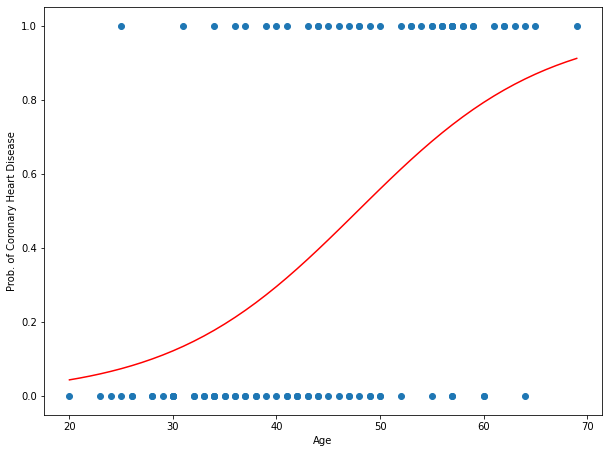

In [8]:
plt.figure(figsize=(10,7.5))
plt.plot(dat['age'], dat['chd'], 'o')
plt.plot(x0, (logreg.predict_proba(x0[:,None]).T)[1,], 'r'),
plt.xlabel('Age')
plt.ylabel('Prob. of Coronary Heart Disease')